In [1]:
%matplotlib inline 

from imports import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


C:\ProgramData\Anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


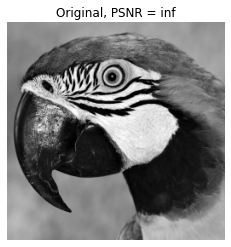

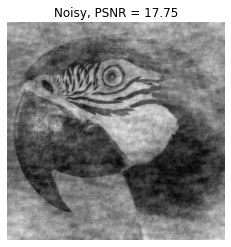

In [2]:
params = create_problem(img_path='./data/Set12/07.png')

psnr_display(img_path='./data/Set12/07.png', output=params['original'], title="Original")

psnr_display(img_path='./data/Set12/07.png', output=params['noisy'], title="Noisy")

### Denoising grayscale images with PnP-SVRG

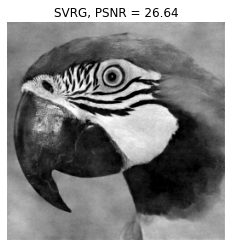

In [21]:
params = create_problem(img_path='./data/Set12/07.png', device=device, cnn_decay=0.90)

svrg_out, svrg_time, svrg_psnr, svrg_zs = pnp_svrg(params=params,
                                                   denoiser='cnn',
                                                   eta=20e3, tt=20, T2=10, 
                                                   mini_batch_size=int(20e3), verbose=False)

psnr_display(img_path='./data/Set12/07.png', output=svrg_out, title="SVRG")

In [ ]:
'''
Visualize GIF of denoising
'''

gif(svrg_zs)

### PnP-GD

In [23]:
params = create_problem('./data/Set12/07.png', device=device)

gd_out, gd_time, gd_psnr, gd_zs = pnp_gd(params=params,
                                         denoiser='cnn',
                                         eta=40e3, tt=20)

psnr_display(img_path='./data/Set12/07.png', output=gd_out, title="GD")

### PnP-SGD

In [15]:
params = create_problem('./data/Set12/07.png', device=device)

sgd_out, sgd_time, sgd_psnr, sgd_zs = pnp_sgd(params=params,
                                              denoiser='cnn',
                                              eta=20e3, tt=20, 
                                              mini_batch_size=int(20e3))

psnr_display(img_path='./data/Set12/07.png', output=sgd_out, title="SGD")

### PnP-LSVRG

In [16]:
params = create_problem('./data/Set12/07.png', device=device)

lsvrg_out, lsvrg_time, lsvrg_psnr, lsvrg_zs = pnp_lsvrg(params=params,
                                                denoiser='cnn',
                                                eta=20e3, tt=20, 
                                                mini_batch_size=int(20e3))

psnr_display(img_path='./data/Set12/07.png', output=lsvrg_out, title="LSVRG")

### Denoising RGB images with PnP-SVRG

In [3]:
original, noisy, denoised = denoise_rgb(img_path='./flickr30k/train/2594902417.jpg')

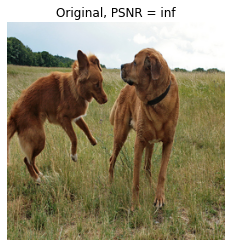

In [4]:
psnr_display(img=original, output=original, title="Original")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


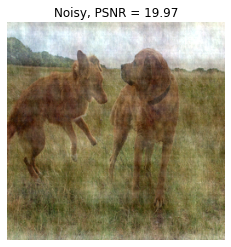

In [5]:
psnr_display(img=original, output=noisy, title="Noisy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


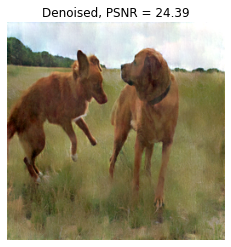

In [6]:
psnr_display(img=original, output=denoised, title="Denoised")

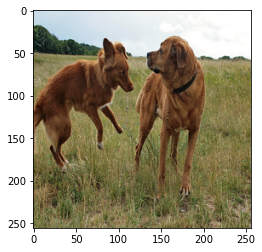

(256, 256, 3)


In [228]:
img = np.array(Image.open('./flickr30k/train/2594902417.jpg').resize((256,256)), dtype=int)
imgplot = plt.imshow(img)
plt.show()
print(img.shape)
img = np.array(Image.open('./flickr30k/train/2594902417.jpg').resize((256,256)), dtype=float)

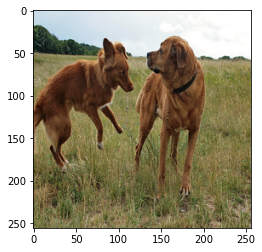

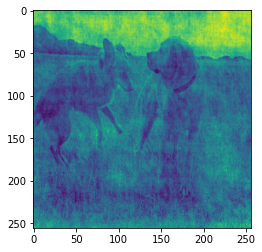

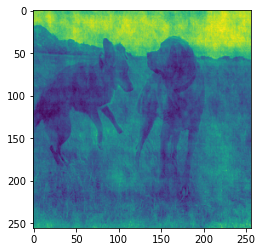

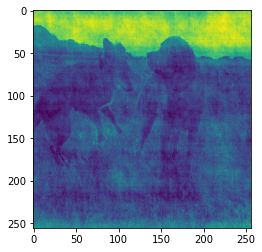

[[0.00353127 0.02050648 0.01668286 ... 0.07430981 0.07600041 0.05615889]
 [0.01364917 0.01888486 0.0232019  ... 0.05480145 0.0560949  0.05253306]
 [0.03002695 0.01699488 0.01589131 ... 0.05028037 0.04392536 0.05543663]
 ...
 [0.14336984 0.15946896 0.16382948 ... 0.17686388 0.12571063 0.16575396]
 [0.14438697 0.152749   0.13212435 ... 0.12764618 0.16733839 0.16592714]
 [0.15469709 0.15187145 0.1452928  ... 0.10812262 0.17474832 0.13373361]]
0 255
<class 'numpy.uint8'>
<class 'numpy.uint8'>


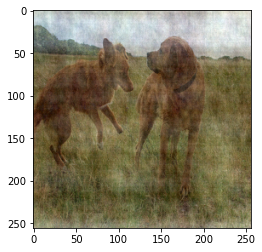

In [223]:
slice0 = img[:,:,0]
slice1 = img[:,:,1]
slice2 = img[:,:,2]

img0 = np.zeros((256,256,3), 'uint8')
img0[:, :, 0] = slice0
img0[:, :, 1] = slice1
img0[:, :, 2] = slice2

imgplot = plt.imshow(img0)
plt.show()

slice0_res = create_problem(img=img[:,:,0], H=256, W=256, sigma=5)
slice1_res = create_problem(img=img[:,:,1], H=256, W=256, sigma=5)
slice2_res = create_problem(img=img[:,:,2], H=256, W=256, sigma=5)

noisy = np.zeros((256,256,3), 'float')
noisy[:, :, 0] = slice0_res['noisy']
noisy[:, :, 1] = slice1_res['noisy']
noisy[:, :, 2] = slice2_res['noisy']

imgplot = plt.imshow(slice0_res['noisy'])
plt.show()

imgplot = plt.imshow(slice1_res['noisy'])
plt.show()

imgplot = plt.imshow(slice2_res['noisy'])
plt.show()

print(slice0_res['noisy'] - slice2_res['noisy'])
# noisy = np.rollaxis(np.array([slice0_res['noisy'], slice1_res['noisy'], slice2_res['noisy']]), 0, 3)
noisy = (((noisy - noisy.min() ) / (noisy.max() - noisy.min()))*255).astype('uint8')
print(noisy.min(), noisy.max())
# print(noisy.shape)
# noisy = noisy.astype(np.uint8)
print(type(img0[0,0,0]))
print(type(noisy[0,0,0]))
imgplot = plt.imshow(noisy)
plt.savefig('noisy.jpg')
plt.show()

In [224]:
z_slice0, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice0_res, 'nlm', eta=1000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

After gradient update: 0 0 20.04847270313801
After denoising update: 0 0 20.0806726920067

After gradient update: 0 1 20.124405233058283
After denoising update: 0 1 20.142149542754435

After gradient update: 0 2 20.186548905831767
After denoising update: 0 2 20.181757047916832

After gradient update: 0 3 20.227732715510488
After denoising update: 0 3 20.20892023342219

After gradient update: 0 4 20.25650350734717
After denoising update: 0 4 20.230553471896215

After gradient update: 0 5 20.278324213516342
After denoising update: 0 5 20.25020190936893

After gradient update: 0 6 20.29643090993462
After denoising update: 0 6 20.26836399711876

After gradient update: 0 7 20.31997363416499
After denoising update: 0 7 20.292217762130058

After gradient update: 0 8 20.34219513685833
After denoising update: 0 8 20.313816271393527

After gradient update: 0 9 20.367829327060456
After denoising update: 0 9 20.339755963697698

After gradient update: 0 10 20.392410676504404
After denoising update:

After gradient update: 5 13 21.958114655974903
After denoising update: 5 13 21.922564102206017

After gradient update: 5 14 21.97094079026867
After denoising update: 5 14 21.935332574586894

After gradient update: 6 0 21.984462317304335
After denoising update: 6 0 21.948642763461194

After gradient update: 6 1 21.997709245129002
After denoising update: 6 1 21.961697576064818

After gradient update: 6 2 22.01056626297938
After denoising update: 6 2 21.974388543422613

After gradient update: 6 3 22.023308869664714
After denoising update: 6 3 21.987053638984083

After gradient update: 6 4 22.035937661651815
After denoising update: 6 4 21.9995846054815

After gradient update: 6 5 22.048406280208578
After denoising update: 6 5 22.011971477421575

After gradient update: 6 6 22.060726769109046
After denoising update: 6 6 22.024185916136414

After gradient update: 6 7 22.072879977361684
After denoising update: 6 7 22.036300844013144

After gradient update: 6 8 22.084914747107188
After denoisin

After gradient update: 11 10 22.79170087829124
After denoising update: 11 10 22.755474465279477

After gradient update: 11 11 22.79847007940961
After denoising update: 11 11 22.762272773356422

After gradient update: 11 12 22.805214900334022
After denoising update: 11 12 22.76907095223319

After gradient update: 11 13 22.81193698730632
After denoising update: 11 13 22.775767190365123

After gradient update: 11 14 22.818387572723417
After denoising update: 11 14 22.782265835898407

After gradient update: 12 0 22.82495287103969
After denoising update: 12 0 22.78886038801413

After gradient update: 12 1 22.83148395890507
After denoising update: 12 1 22.7954026613997

After gradient update: 12 2 22.837957817783163
After denoising update: 12 2 22.801895260218824

After gradient update: 12 3 22.844394043586625
After denoising update: 12 3 22.808348842332894

After gradient update: 12 4 22.850783373369215
After denoising update: 12 4 22.814771001083834

After gradient update: 12 5 22.85710688

After gradient update: 17 6 23.229927283643967
After denoising update: 17 6 23.19625298262642

After gradient update: 17 7 23.23365304162383
After denoising update: 17 7 23.200008953222977

After gradient update: 17 8 23.237354145082477
After denoising update: 17 8 23.203764674187525

After gradient update: 17 9 23.241017854662125
After denoising update: 17 9 23.20749476578364

After gradient update: 17 10 23.244735175453165
After denoising update: 17 10 23.211286136000613

After gradient update: 17 11 23.24852927823175
After denoising update: 17 11 23.2151592977521

After gradient update: 17 12 23.25221009265778
After denoising update: 17 12 23.218962101778544

After gradient update: 17 13 23.255930450639248
After denoising update: 17 13 23.22280084257436

After gradient update: 17 14 23.259689075957915
After denoising update: 17 14 23.226591943040198

After gradient update: 18 0 23.26347142694035
After denoising update: 18 0 23.23042005402312

After gradient update: 18 1 23.267244260

In [225]:
z_slice1, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice1_res, 'nlm', eta=3000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

After gradient update: 0 0 19.976982789162193
After denoising update: 0 0 20.014708775943618

After gradient update: 0 1 20.14258838848512
After denoising update: 0 1 20.157779821255136

After gradient update: 0 2 20.283355111506488
After denoising update: 0 2 20.272060014136684

After gradient update: 0 3 20.400215266817376
After denoising update: 0 3 20.37766810501898

After gradient update: 0 4 20.499802308591622
After denoising update: 0 4 20.4732896187515

After gradient update: 0 5 20.602446061078066
After denoising update: 0 5 20.572433232243146

After gradient update: 0 6 20.688187347096818
After denoising update: 0 6 20.655450487985295

After gradient update: 0 7 20.760515629945544
After denoising update: 0 7 20.725523304691276

After gradient update: 0 8 20.83593391816501
After denoising update: 0 8 20.800457595144866

After gradient update: 0 9 20.904861824471848
After denoising update: 0 9 20.869707049936498

After gradient update: 0 10 20.978661379550473
After denoising up

After gradient update: 5 13 23.59928134617008
After denoising update: 5 13 23.526688390685038

After gradient update: 5 14 23.61535214253721
After denoising update: 5 14 23.54261789013194

After gradient update: 6 0 23.63124866319131
After denoising update: 6 0 23.557914776801432

After gradient update: 6 1 23.646520614012218
After denoising update: 6 1 23.573213199570233

After gradient update: 6 2 23.661747054574214
After denoising update: 6 2 23.588402876462887

After gradient update: 6 3 23.676795454107623
After denoising update: 6 3 23.60340070828419

After gradient update: 6 4 23.69179666547371
After denoising update: 6 4 23.61823828515485

After gradient update: 6 5 23.7067458420971
After denoising update: 6 5 23.632980872063484

After gradient update: 6 6 23.721050398751103
After denoising update: 6 6 23.647356657013106

After gradient update: 6 7 23.735317107837247
After denoising update: 6 7 23.661381866706336

After gradient update: 6 8 23.74942368089571
After denoising upda

After gradient update: 11 10 24.480872794116806
After denoising update: 11 10 24.409945269881725

After gradient update: 11 11 24.487444137083795
After denoising update: 11 11 24.416662932302362

After gradient update: 11 12 24.49401259025992
After denoising update: 11 12 24.423406397052297

After gradient update: 11 13 24.500765473147943
After denoising update: 11 13 24.430145533580358

After gradient update: 11 14 24.507276528280137
After denoising update: 11 14 24.436945807549677

After gradient update: 12 0 24.513883653254464
After denoising update: 12 0 24.443587108700086

After gradient update: 12 1 24.52035670795665
After denoising update: 12 1 24.450196157894652

After gradient update: 12 2 24.526768607040474
After denoising update: 12 2 24.45675933214919

After gradient update: 12 3 24.533167822207545
After denoising update: 12 3 24.463304794128344

After gradient update: 12 4 24.539593812808764
After denoising update: 12 4 24.46982463163836

After gradient update: 12 5 24.545

After gradient update: 17 6 24.88691438437053
After denoising update: 17 6 24.827072243393587

After gradient update: 17 7 24.890044002093212
After denoising update: 17 7 24.830341255644278

After gradient update: 17 8 24.893203073913618
After denoising update: 17 8 24.83361259036535

After gradient update: 17 9 24.896249978177618
After denoising update: 17 9 24.83684954019914

After gradient update: 17 10 24.89936798394823
After denoising update: 17 10 24.840066958517642

After gradient update: 17 11 24.902303321953575
After denoising update: 17 11 24.84315668017704

After gradient update: 17 12 24.90527067861748
After denoising update: 17 12 24.84621285418537

After gradient update: 17 13 24.90830425666715
After denoising update: 17 13 24.849392020764284

After gradient update: 17 14 24.911333565861845
After denoising update: 17 14 24.852582428800023

After gradient update: 18 0 24.91422975648711
After denoising update: 18 0 24.855620845568737

After gradient update: 18 1 24.91710609

In [226]:
z_slice2, time_SVRG, psnr_SVRG, zs_SVRG = pnp_svrg(slice2_res, 'nlm', eta=3000, tt=100, T2=15, mini_batch_size=5000, verbose=True)

After gradient update: 0 0 20.07977792734101
After denoising update: 0 0 20.12126336350201

After gradient update: 0 1 20.25673155306668
After denoising update: 0 1 20.277024289703277

After gradient update: 0 2 20.40536334990731
After denoising update: 0 2 20.39781091340711

After gradient update: 0 3 20.53131929922856
After denoising update: 0 3 20.509824891612695

After gradient update: 0 4 20.64818625838904
After denoising update: 0 4 20.61991192049108

After gradient update: 0 5 20.742581846549456
After denoising update: 0 5 20.70986357346921

After gradient update: 0 6 20.846625605457355
After denoising update: 0 6 20.811961038019938

After gradient update: 0 7 20.93983883521108
After denoising update: 0 7 20.9039368102019

After gradient update: 0 8 21.02099199832255
After denoising update: 0 8 20.984451930781525

After gradient update: 0 9 21.117725757728184
After denoising update: 0 9 21.080046123857382

After gradient update: 0 10 21.2145791419381
After denoising update: 0 10

After gradient update: 5 13 24.059645664585187
After denoising update: 5 13 23.97533187572826

After gradient update: 5 14 24.077871101601662
After denoising update: 5 14 23.99287623862833

After gradient update: 6 0 24.09530539114897
After denoising update: 6 0 24.01015921410046

After gradient update: 6 1 24.112519881500628
After denoising update: 6 1 24.027185592539592

After gradient update: 6 2 24.129568022115578
After denoising update: 6 2 24.043929315831342

After gradient update: 6 3 24.146324022967555
After denoising update: 6 3 24.060449117715947

After gradient update: 6 4 24.16281529773626
After denoising update: 6 4 24.07668562793151

After gradient update: 6 5 24.17895949354097
After denoising update: 6 5 24.092635252397073

After gradient update: 6 6 24.194828891176595
After denoising update: 6 6 24.108284385726392

After gradient update: 6 7 24.21057507643245
After denoising update: 6 7 24.12385459525247

After gradient update: 6 8 24.225802089977538
After denoising upd

After gradient update: 11 10 25.041630462624195
After denoising update: 11 10 24.955053071066388

After gradient update: 11 11 25.04871208114469
After denoising update: 11 11 24.962444100156223

After gradient update: 11 12 25.055999173868496
After denoising update: 11 12 24.96994707794539

After gradient update: 11 13 25.06360176374273
After denoising update: 11 13 24.97760320011805

After gradient update: 11 14 25.07092620592665
After denoising update: 11 14 24.98526048414731

After gradient update: 12 0 25.078388057374603
After denoising update: 12 0 24.99270942445495

After gradient update: 12 1 25.0856607139144
After denoising update: 12 1 25.000115066772022

After gradient update: 12 2 25.092848944392358
After denoising update: 12 2 25.007455160030545

After gradient update: 12 3 25.099999000856936
After denoising update: 12 3 25.0146723964846

After gradient update: 12 4 25.107145970542277
After denoising update: 12 4 25.02189447440482

After gradient update: 12 5 25.11402900814

After gradient update: 17 6 25.516284434104367
After denoising update: 17 6 25.44142753138842

After gradient update: 17 7 25.520303120728883
After denoising update: 17 7 25.445655619612157

After gradient update: 17 8 25.524143021344866
After denoising update: 17 8 25.449690534598545

After gradient update: 17 9 25.528145403935337
After denoising update: 17 9 25.453826045531088

After gradient update: 17 10 25.531934114895446
After denoising update: 17 10 25.45784546858437

After gradient update: 17 11 25.53575754377695
After denoising update: 17 11 25.461840251958417

After gradient update: 17 12 25.53963660186714
After denoising update: 17 12 25.465884406610634

After gradient update: 17 13 25.54361848587991
After denoising update: 17 13 25.469947544531763

After gradient update: 17 14 25.547219512920215
After denoising update: 17 14 25.473863624483876

After gradient update: 18 0 25.55109708094755
After denoising update: 18 0 25.477792053844066

After gradient update: 18 1 25.55484

(256, 256, 3)


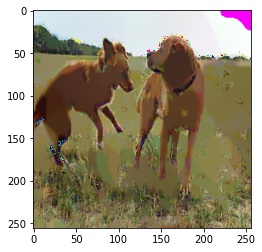

In [227]:
denoised = np.zeros((256,256,3), 'uint8')
denoised[..., 0] = z_slice0*256
denoised[..., 1] = z_slice1*256
denoised[..., 2] = z_slice2*256
print(denoised.shape)
imgplot = plt.imshow(denoised)
plt.show()